# Analysis of Heart Failure clinical records
##### Dataset used: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('heart_failure_clinical_records_dataset.csv')    # read data from csv file

number_of_patients = data.shape[0]  # number of patients
number_of_patients = len(data)
print(number_of_patients)

299


In [2]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
correlation_matrix = data.corr()    # correlation matrix
correlation_matrix['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

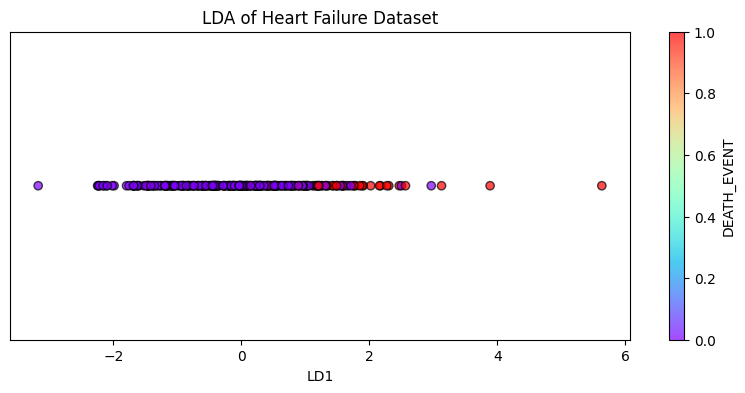

In [5]:
X = data.drop(['DEATH_EVENT','time'], axis=1)   # features
y = data['DEATH_EVENT'] # target variable
lda = LinearDiscriminantAnalysis(n_components=1)    # LDA
X_lda = lda.fit_transform(X, y) # fit and transform data

plt.figure(figsize=(10, 4))
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap='rainbow', edgecolor='k', alpha=0.7)
plt.title('LDA of Heart Failure Dataset')
plt.xlabel('LD1')
plt.yticks([])
plt.colorbar(label='DEATH_EVENT')
plt.show()

In [6]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

lda_coefs = lda.coef_[0]    # coefficients of LDA

feature_names = X.columns
coefficients = pd.Series(lda_coefs, index=feature_names).sort_values(ascending=False)

print(coefficients)


serum_creatinine            6.342153e-01
high_blood_pressure         4.053478e-01
anaemia                     3.273534e-01
diabetes                    9.923408e-02
smoking                     7.995616e-02
age                         5.375866e-02
creatinine_phosphokinase    2.911027e-04
platelets                  -4.301301e-07
ejection_fraction          -6.317638e-02
serum_sodium               -6.537963e-02
sex                        -3.731690e-01
dtype: float64


In [7]:
X = data.drop(['DEATH_EVENT','time'], axis=1)   # features
y = data['DEATH_EVENT'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)    # logistic regression

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)   # accuracy, roc_auc, classification report
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)  # precision, recall, f1-score

print(accuracy_log_reg)
print(roc_auc_log_reg)
print(report_log_reg)


0.6666666666666666
0.6068332483426823
              precision    recall  f1-score   support

           0       0.65      0.94      0.77        53
           1       0.77      0.27      0.40        37

    accuracy                           0.67        90
   macro avg       0.71      0.61      0.58        90
weighted avg       0.70      0.67      0.62        90



In [8]:
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"LDA acc: {accuracy:.4f}")

LDA acc: 0.6889


In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)  # scaling
x_test_scaled = scaler.transform(X_test)

k_nearest_neighbors_model = KNeighborsClassifier(n_neighbors=5) # K Nearest Neighbors
k_nearest_neighbors_model.fit(x_train_scaled, y_train)
k_nearest_neighbors_predictions = k_nearest_neighbors_model.predict(x_test_scaled)
k_nearest_neighbors_accuracy = np.mean(k_nearest_neighbors_predictions == y_test)
print(f'K Nearest Neighbors Accuracy: {k_nearest_neighbors_accuracy}')

K Nearest Neighbors Accuracy: 0.6444444444444445


0.6666666666666666


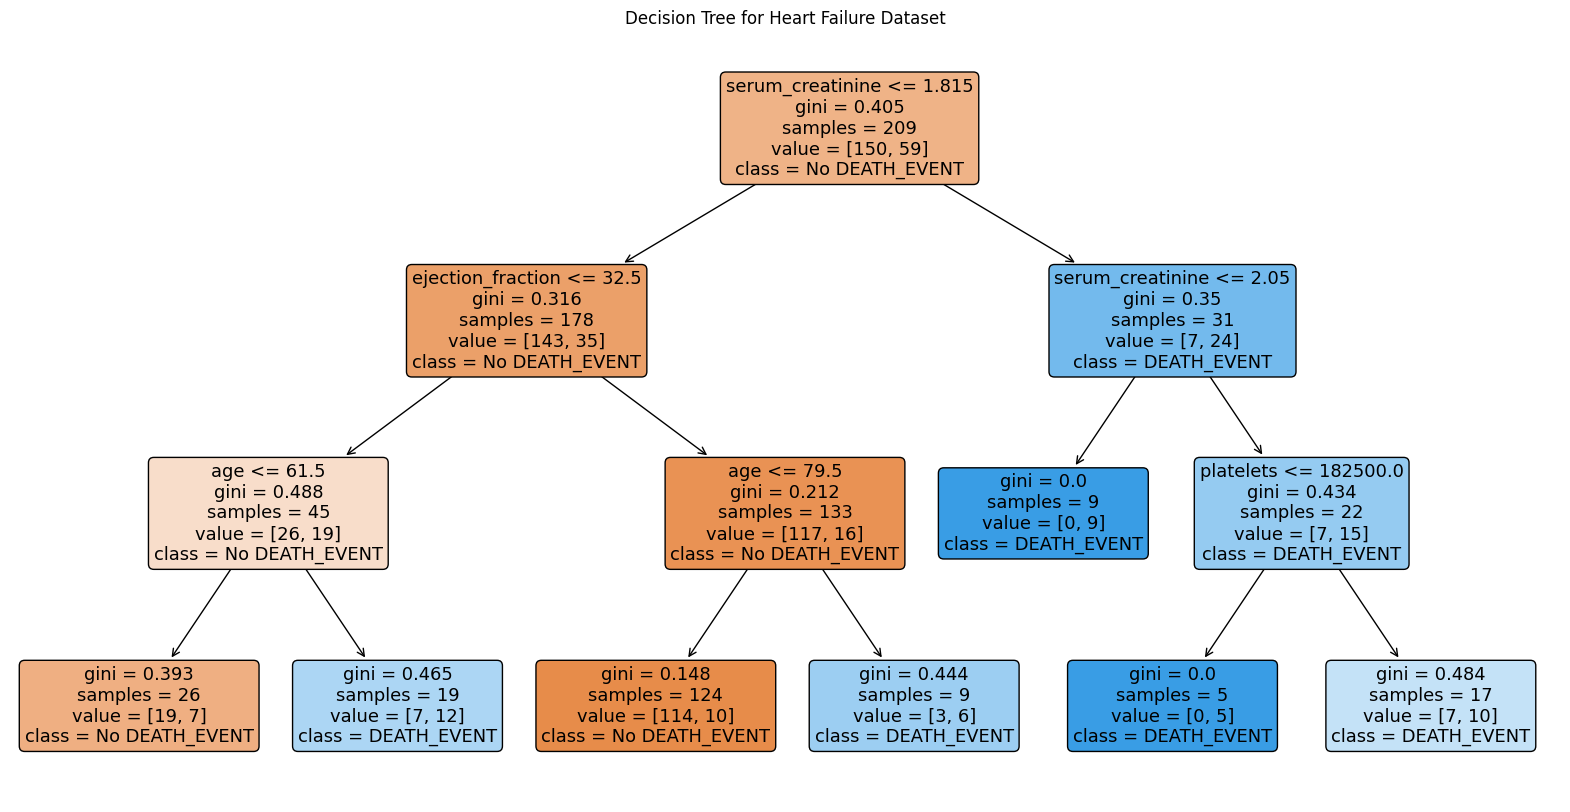

In [10]:
X = data.drop(['DEATH_EVENT','time'], axis=1)   # features
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(max_depth=3,random_state=42) # Decision Tree max depth of 3 was best

decision_tree.fit(X_train, y_train)

y_pred_decision_tree = decision_tree.predict(X_test)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print(accuracy_decision_tree)
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['No DEATH_EVENT', 'DEATH_EVENT'], rounded=True) # Decision Tree Plot
plt.title("Decision Tree for Heart Failure Dataset")
plt.show()

In [11]:
importances = decision_tree.feature_importances_

feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)    # feature importances

print(feature_importances)


serum_creatinine            0.540314
age                         0.247072
ejection_fraction           0.175175
platelets                   0.037440
anaemia                     0.000000
creatinine_phosphokinase    0.000000
diabetes                    0.000000
high_blood_pressure         0.000000
serum_sodium                0.000000
sex                         0.000000
smoking                     0.000000
dtype: float64


In [12]:
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)   # accuracy, precision, recall, f1-score, confusion matrix
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

print("Decision Tree info:")   # Decision Tree info
print(f"Accuracy: {accuracy_decision_tree:.4f}")
print(f"Precision: {precision_decision_tree:.4f}")
print(f"Recall: {recall_decision_tree:.4f}")
print(f"F1 Score: {f1_decision_tree:.4f}")

Decision Tree info:
Accuracy: 0.6667
Precision: 0.6296
Recall: 0.4595
F1 Score: 0.5312


In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) info:")    # KNN info
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

K-Nearest Neighbors (KNN) info:
Accuracy: 0.5778
Precision: 0.4545
Recall: 0.1351
F1 Score: 0.2083


Logistic Regression Info:
Accuracy: 0.6667
Precision: 0.7692
Recall: 0.2703
F1 Score: 0.4000

LDA info:
Accuracy: 0.6667
Precision: 0.7059
Recall: 0.3243
F1 Score: 0.4444


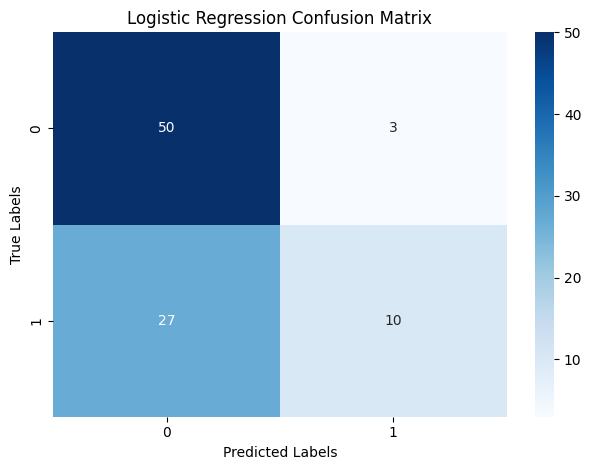

In [14]:
X = data.drop(['DEATH_EVENT','time'], axis=1)   # features defined again for ease of use
y = data['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   # train test split

logistic_regression = LogisticRegression(max_iter=1000, random_state=42)    # logistic regression and LDA
lda = LinearDiscriminantAnalysis()

logistic_regression.fit(X_train, y_train)   # fit
lda.fit(X_train, y_train)

y_pred_log_reg = logistic_regression.predict(X_test)    # predict
y_pred_lda = lda.predict(X_test)

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)  # confusion matrix
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)   # accuracy, precision, recall, f1-score
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

print("Logistic Regression Info:")  # Logistic Regression info
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}\n")

print("LDA info:")  # LDA info
print(f"Accuracy: {accuracy_lda:.4f}")
print(f"Precision: {precision_lda:.4f}")
print(f"Recall: {recall_lda:.4f}")
print(f"F1 Score: {f1_lda:.4f}")


sns.heatmap(conf_matrix_log_reg, annot=True, cmap='Blues', fmt='g') # confusion matrix plot
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')



plt.tight_layout()
plt.show()

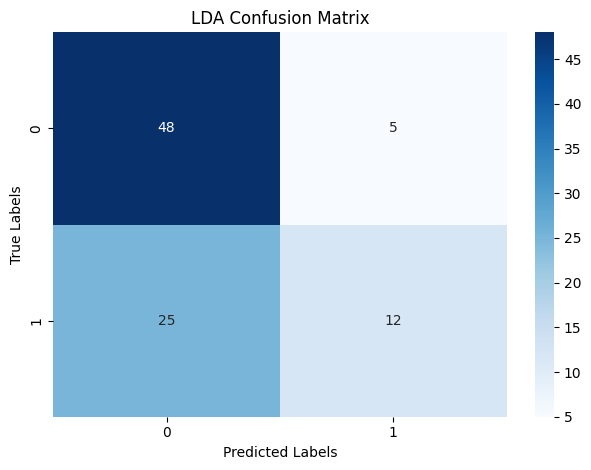

In [15]:
sns.heatmap(conf_matrix_lda, annot=True, cmap='Blues', fmt='g') # confusion matrix
plt.title('LDA Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

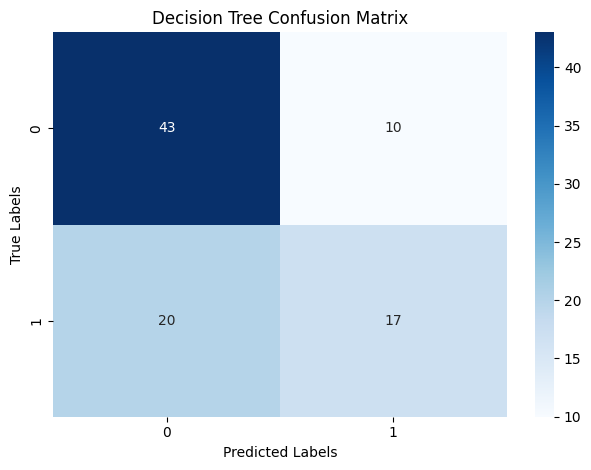

In [16]:
sns.heatmap(conf_matrix_decision_tree, annot=True, cmap='Blues', fmt='g')   # confusion matrix plots
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()